# UNAD Santiago Cepeda Vargas - KMeans y HC - Mall Costumers

In [254]:
#Importamos las bibliotecas necesarias
import numpy as np #Librerias para el cálculo numérico y el análisis de datos
import pandas as pd #Librerias para el manejo y análisis de estructuras de datos
import seaborn as sns #Librerias para la creación de gráficos estadísticos
import matplotlib.pyplot as plt #Librerias para creación de gráficos en dos dimensiones

import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones
from tabulate import tabulate # Creación de tablas de texto
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# librerías de para implementar modelo Kmeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# librerías de para la evaluación del modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Librería para evitar advertencias
import warnings
warnings.filterwarnings('ignore')

In [105]:
# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
#Cargamos el dataset "Mall Costumers" 
data = pd.read_csv('C:/Users/Usuario/Desktop/ANALISIS DE DATOS 2/Datasets/Mall_Customers.csv')

In [18]:
# Mostrar las primeras filas del dataset para entender su estructura
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
#Visualizamos la descripción de los datos
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [30]:
#Comprobamos valores faltantes por columna
print("\nValores faltantes por columna:")
print(tabulate(data.isnull().sum().reset_index(), headers=['Column', 'Missing Values'], tablefmt='psql'))


Valores faltantes por columna:
+----+------------------------+------------------+
|    | Column                 |   Missing Values |
|----+------------------------+------------------|
|  0 | CustomerID             |                0 |
|  1 | Gender                 |                0 |
|  2 | Age                    |                0 |
|  3 | Annual Income (k$)     |                0 |
|  4 | Spending Score (1-100) |                0 |
+----+------------------------+------------------+


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

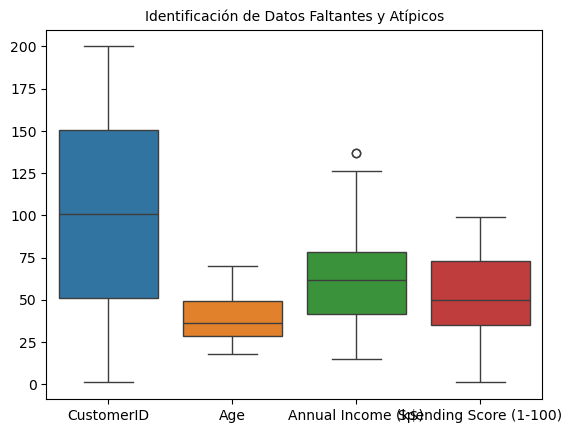

In [118]:
#Identificamos datos faltantes y atípicos
sns.boxplot(data=data)
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

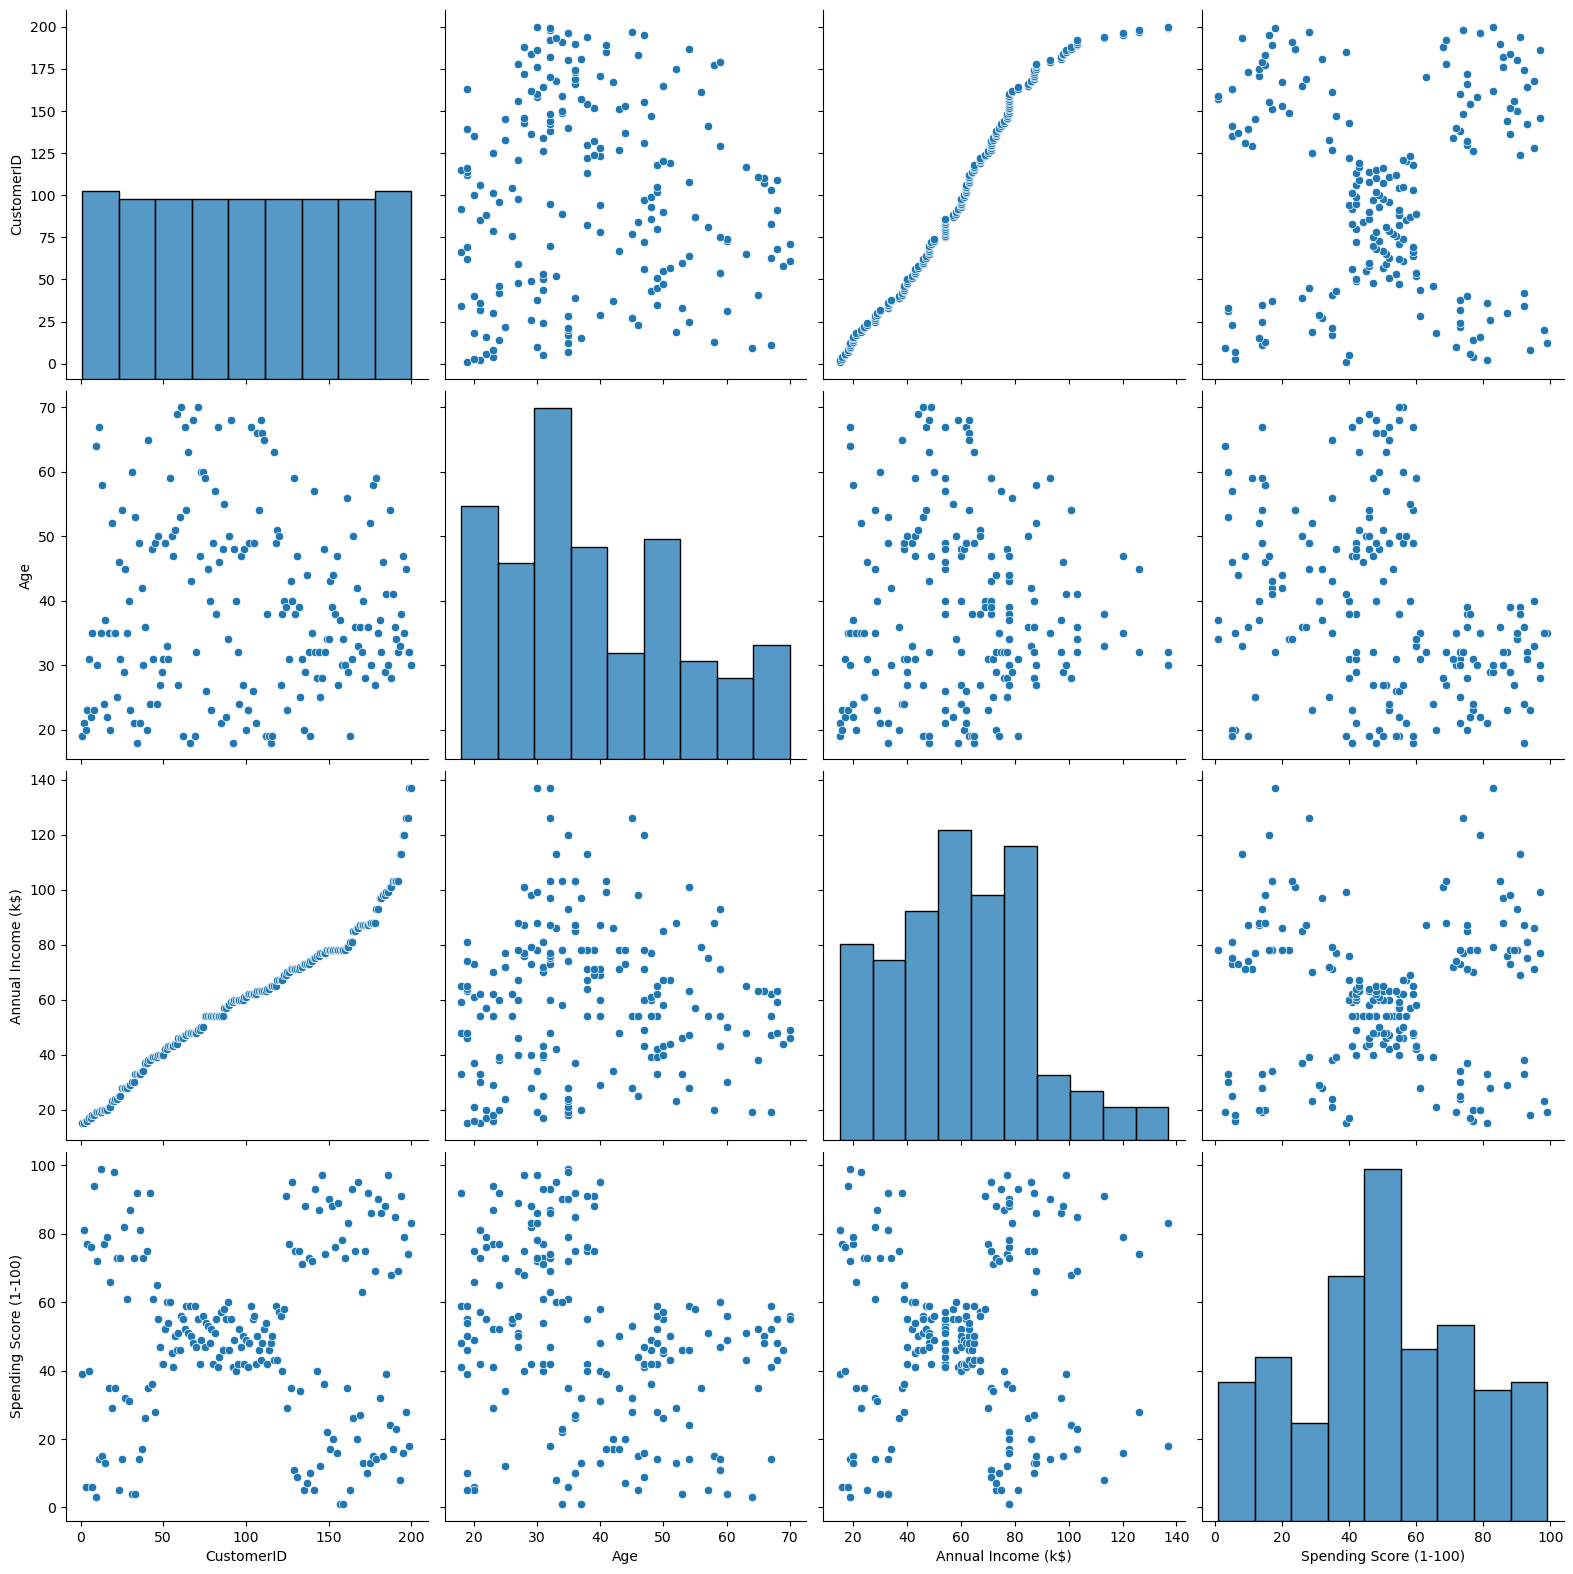

In [116]:
#Comprobamos la relación entre variables con pairplot
sns.pairplot(data.dropna(), size=4,kind='scatter')

In [34]:
# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [36]:
#Revisamos si existen datos faltantes en las columnas que seleccionamos para estudiar, 
print("Cantidad de Registros Vacios: ",data['CustomerID'].isnull().sum())
print("Cantidad de Registros Vacios: ",data['Gender'].isnull().sum())
print("Cantidad de Registros Vacios: ",data['Age'].isnull().sum())
print("Cantidad de Registros Vacios: ",data['Annual Income (k$)'].isnull().sum())
print("Cantidad de Registros Vacios: ",data['Spending Score (1-100)'].isnull().sum())

Cantidad de Registros Vacios:  0
Cantidad de Registros Vacios:  0
Cantidad de Registros Vacios:  0
Cantidad de Registros Vacios:  0
Cantidad de Registros Vacios:  0


In [44]:
#Comprobamos que no existen registros vacíos ni datos atípicos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [74]:
# Estandarizamos los datos antes de realizar alguna edición excuyendo los datos de tipos que no se pueden estandarizar (string)
include = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(include)

In [72]:
# 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [78]:
# Seleccionamos las características "Age. Annual Income. Spending Score" que discriminamos anteriormente y estandarizamos
datashow = data[["Age","Annual Income (k$)","Spending Score (1-100)"]]
datashow.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [109]:
#Debido a que para ambas actividades se usa el mismo database, en lugar de realizar el proceso anterior de limpieza dos veces, se presenta tanto KMEANS como HIERACHICAL CLUSTERING en este mismo documento.
#Desde acá en adelante, se dividen las actividades por cada uno

## KMEANS

In [80]:
# 4. Entrenar el modelo configurando los diferentes hiperparámetros.

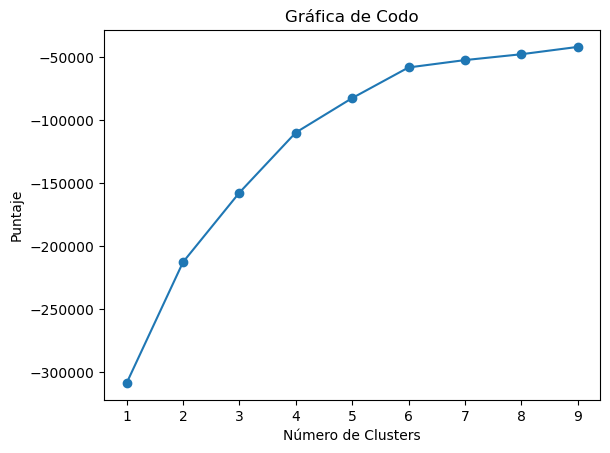

In [94]:
# Con la ayuda de una gráfica de codo identificamos la cantidade clusters
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(datashow).score(datashow) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntaje')
plt.title('Gráfica de Codo')
plt.show()

In [186]:
# Aplicamos el algoritmo K-Means con 3 clústeres al conjunto de datos datashow
kmeans = KMeans(n_clusters=3).fit(X)
# Obtenemos las coordenadas de los centroides de los clústeres generados
centroids = kmeans.cluster_centers_
# Mostramos las coordenadas de los centroides de los 3 clústeres
centroids

array([[-0.94723685, -1.05372479,  0.52219513],
       [ 0.95048648, -0.1852789 , -0.60744324],
       [-0.5563912 ,  0.8480399 ,  0.40525396]])

In [216]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.labels_

# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row]) 

In [218]:
# Normalizamos los datos de entrada [[5.4, 3.3, 1.2]] utilizando el escalador 'scaler' lo que transforma los datos a la misma escala utilizada durante el entrenamiento del modelo KMeans
datashow_new = scaler.fit_transform(np.array([[5.4, 3.3, 1.2]]))

# Predecimos a qué clúster pertenece el nuevo punto utilizando el modelo KMeans entrenado
new_label = kmeans.predict(datashow_new)
# Creamos una lista vacía llamada 'color' para asignar el color correspondiente a la etiqueta del clúster
color = []
# Iteramos sobre las etiquetas predichas para asignar un color a cada punto
for row in new_label:
    color.append(colores[row])

# Imprimimos las etiquetas de clúster para el nuevo punto
print(new_label)
# Imprimimos los colores asignados a cada clúster del nuevo punto
print(color)

[2]
['cyan']


In [220]:
# Calculamos las medidas de calidad para K-Means
print("Medidas de calidad para K-Means:")
print("Coeficiente de Silhouette:", metrics.silhouette_score(datashow, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(datashow, labels))
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(datashow, labels))

Medidas de calidad para K-Means:
Coeficiente de Silhouette: 0.268529009799624
Índice de Calinski-Harabasz: 74.98763171047017
Inertia (suma de cuadrados dentro de los clusters): 304.98089300713735
Davies-Bouldin Index: 1.2422728884960377


In [204]:
# 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo
# Creamos gráficas de dispersión entre los datos seleccionados (edad, ingreso y puntaje)

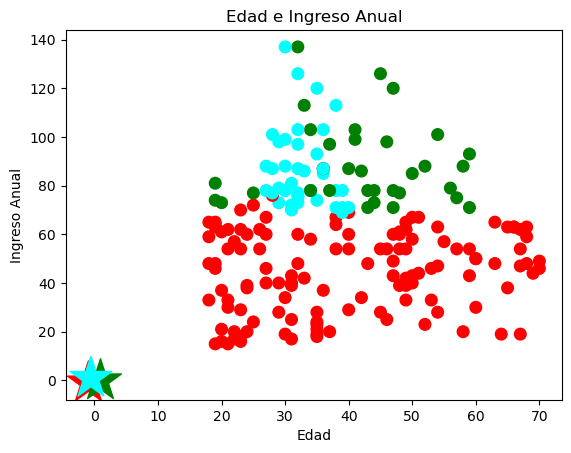

In [276]:
f1 = datashow['Age'].values  # Extrae los valores de la columna 'Age' de datashow y los convierte en una lista
f2 = datashow['Annual Income (k$)'].values   # Extrae los valores de la columna 'Annual Income (k$)' de datashow y los convierte en una lista

# Graficamos un diagrama de dispersión usando f1 y f2 como ejes X e Y, respectivamente
plt.scatter(f1, f2, c=asignar, s=70)  # Dibujamos los puntos de los datos, coloreados según asignar, con un tamaño de marcador de 70
# Graficamos los centroides de los clústeres con un símbolo de estrella ('*'), colorido según colores y con un tamaño de marcador de 1000
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
# Añadimos un título al gráfico
plt.title('Edad e Ingreso Anual')
# Etiquetamos el eje X como 'Edad'
plt.xlabel('Edad')
# Etiquetamos el eje Y como 'Ingreso Anual'
plt.ylabel('Ingreso Anual')
# Muestra el gráfico
plt.show()

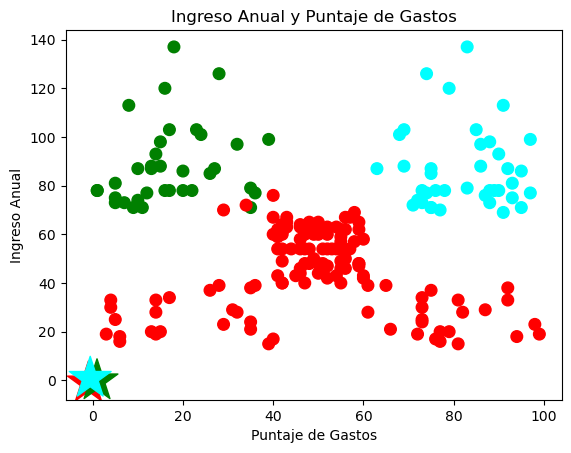

In [272]:
f1 = datashow['Spending Score (1-100)'].values # Extrae los valores de la columna 'Spending Score (1-100)' de datashow y los convierte en una lista
f2 = datashow['Annual Income (k$)'].values # Extrae los valores de la columna 'Annual Income (k$)' de datashow y los convierte en una lista

# Graficamos un diagrama de dispersión usando f1 y f2 como ejes X e Y, respectivamente
plt.scatter(f1, f2, c=asignar, s=70) # Dibujamos los puntos de los datos, coloreados según asignar, con un tamaño de marcador de 70
# Graficamos los centroides de los clústeres con un símbolo de estrella ('*'), colorido según colores y con un tamaño de marcador de 1000
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
# Añadimos un título al gráfico
plt.title('Ingreso Anual y Puntaje de Gastos')
# Etiquetamos el eje X como 'Puntaje de Gastos)'
plt.xlabel('Puntaje de Gastos')
# Etiquetamos el eje Y como 'Ingreso Anual'
plt.ylabel('Ingreso Anual')
# Muestra el gráfico
plt.show()

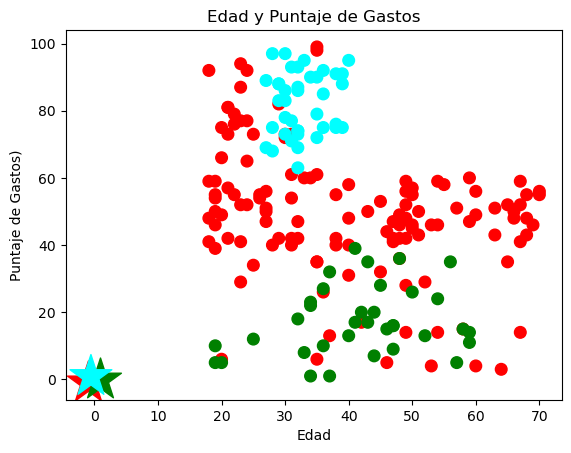

In [278]:
f1 = datashow['Age'].values  # Extrae los valores de la columna 'Age' de datashow y los convierte en una lista
f2 = datashow['Spending Score (1-100)'].values   # Extrae los valores de la columna 'Spending Score (1-100)' de datashow y los convierte en una lista

# Graficamos un diagrama de dispersión usando f1 y f2 como ejes X e Y, respectivamente
plt.scatter(f1, f2, c=asignar, s=70)  # Dibujamos los puntos de los datos, coloreados según asignar, con un tamaño de marcador de 70
# Graficamos los centroides de los clústeres con un símbolo de estrella ('*'), colorido según colores y con un tamaño de marcador de 1000
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
# Añadimos un título al gráfico
plt.title('Edad y Puntaje de Gastos')
# Etiquetamos el eje X como 'Edad'
plt.xlabel('Edad')
# Etiquetamos el eje Y como 'Puntaje de Gastos'
plt.ylabel('Puntaje de Gastos)')
# Muestra el gráfico
plt.show()

## Hierarchical Clustering

In [206]:
# 4. Entrenar el modelo configurando los diferentes hiperparámetros.

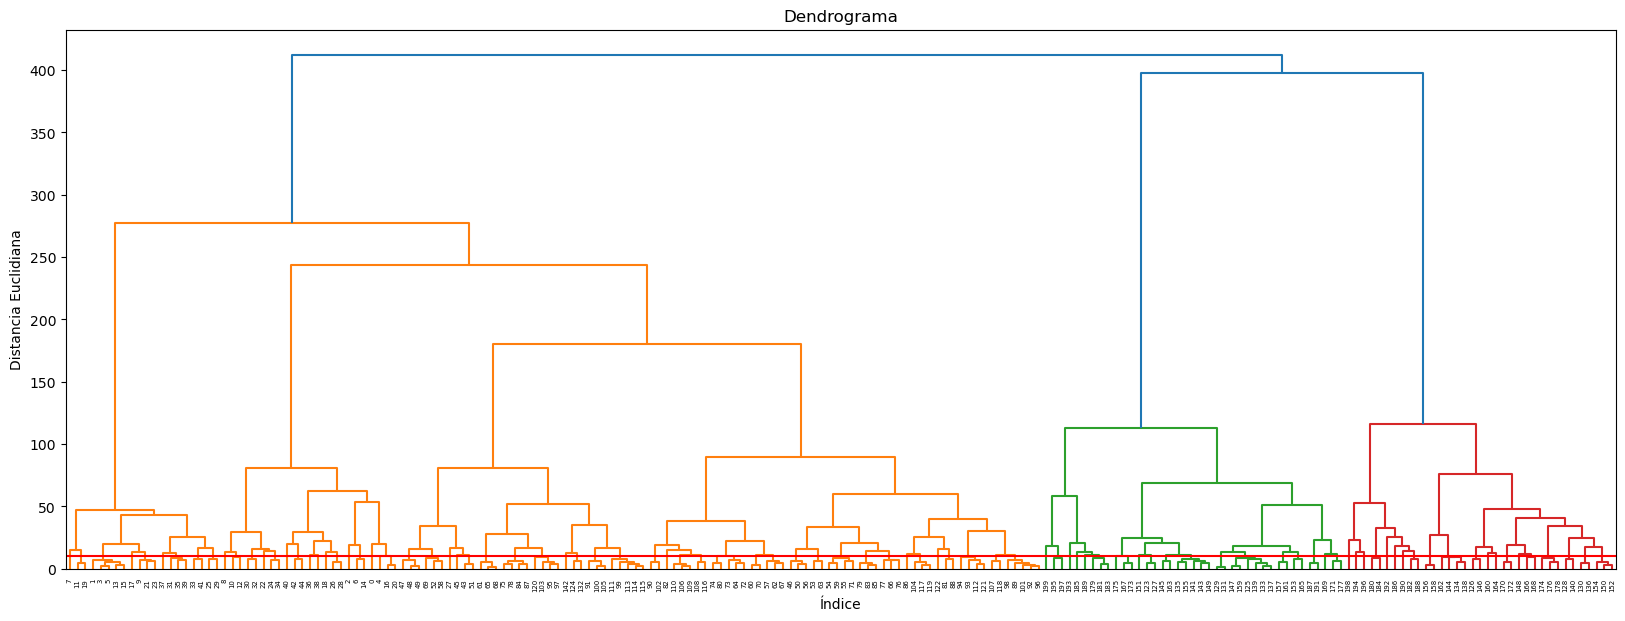

In [232]:
# Realizamos el agrupamiento jerárquico utilizando el método de Ward y la distancia euclidiana
ward_clustering = linkage(datashow, method="ward", metric="euclidean")

# Configuramos el tamaño de la figura para el dendrograma, en este caso 20x7 pulgadas
plt.figure(figsize=(20, 7))
# Dibujamos el dendrograma basado en el agrupamiento jerárquico
dendrogram(ward_clustering)
# Añadimos una línea horizontal roja en la posición y=10 para marcar un umbral de corte en el dendrograma
plt.axhline(y = 10, color = 'r', linestyle = '-')
# Establecemos el título del gráfico
plt.title('Dendrograma')
# Etiquetamos el eje X como 'Índice'
plt.xlabel('Índice')
# Etiquetamos el eje Y como 'Distancia Euclidiana', que representa la distancia de fusión de los clústeres
plt.ylabel('Distancia Euclidiana')

# Mostramos el gráfico
plt.show()

In [208]:
# 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.

In [266]:
hier_clustering = AgglomerativeClustering(n_clusters=3)
labels_hier = hier_clustering.fit_predict(datashow)
labels_hier

# Creamos un objeto AgglomerativeClustering con 3 clústeres como objetivo
# El método AgglomerativeClustering realiza un agrupamiento jerárquico aglomerativo
hier_clustering = AgglomerativeClustering(n_clusters=3)

# Aplicamos el algoritmo de agrupamiento jerárquico a datashow y obtenemos las etiquetas de clúster
# labels_hier contiene el índice del clúster al que pertenece cada punto de los datos
labels_hier = hier_clustering.fit_predict(datashow)

# Mostramos las etiquetas obtenidas para cada punto, que indican el clúster al que pertenece
labels_hier

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [246]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Coeficiente de Shilhouette:", metrics.silhouette_score(datashow, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(datashow, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(datashow, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Coeficiente de Shilhouette: 0.38141795042544546
Índice de Calinski-Harabasz: 111.4623243273518
Davies-Bouldin Index: 0.8603032525623284


In [210]:
# 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

In [260]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = labels_hier
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

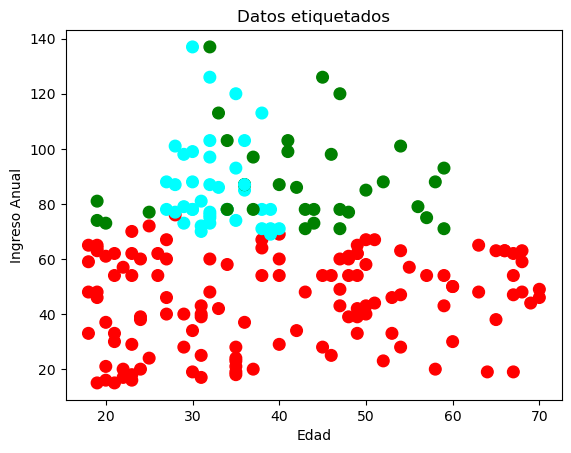

In [268]:
f1 = datashow['Age'].values # Extrae los valores de la columna 'Age' de datashow y los convierte en una lista
f2 = datashow['Annual Income (k$)'].values # Extrae los valores de la columna 'Annual Income (K$)' de datashow y los convierte en una lista
# Graficamos un diagrama de dispersión usando f1 y f2 como ejes X e Y, respectivamente
plt.scatter(f1, f2, c=asignar, s=70) # Dibujamos los puntos de los datos, coloreados según asignar, con un tamaño de marcador de 70
# Añadimos un título al gráfico
plt.title('Datos etiquetados')
# Etiquetamos el eje X como 'Edad'
plt.xlabel('Edad')
# Etiquetamos el eje Y como 'Ingreso Anual)'
plt.ylabel('Ingreso Anual')
# Muestra el gráfico
plt.show()